In [58]:
import dhlab.nbtext as nb
import dhlab.module_update as mu

In [78]:
def list_of_list_to_string(LL):
    
    return '\n\n'.join([' '.join([str(x) for x in line]) for line in LL])

In [165]:
title_len = lambda df: list(map(len, map(lambda x: x.split(), df['title'])))

In [3]:
nb.word_form('vel')

['adv normert',
 'subst nøyt appell ent ub normert',
 'subst nøyt appell fl ub normert',
 'subst nøyt appell ubøy normert']

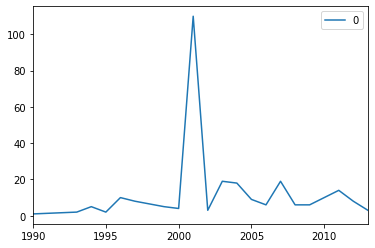

In [4]:
nb.unigram('paratekst', period=(1950, 2020)).plot()

In [14]:
def multi_uni(words, period=(1900, 2020), media='bok'):
    import pandas as pd
    res = dict()
    if isinstance(words, str):
        words = words.split()
    for w in words:
        res[w] = nb.unigram(w, period=period, media = media)
        res[w].columns = [w]
    return pd.concat([res[w] for w in res], axis=1)

In [48]:
punkt = multi_uni(". , i og det er".split()).sum(axis=1)

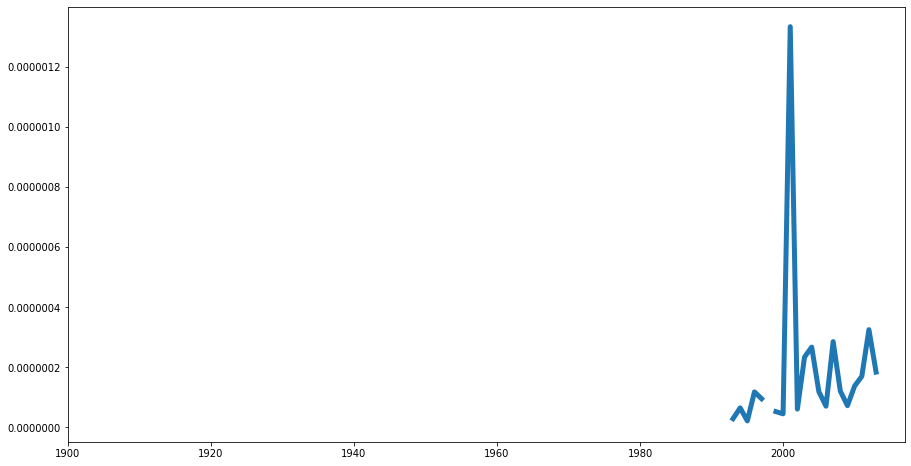

In [56]:
((multi_uni('paratekst Paratekst'.split()).sum(axis=1))/punkt).plot(figsize=(15, 8), lw=5);

In [12]:
urns = nb.book_urn(words=['paratekst', 'Paratekst'], period=(1950, 2020), limit=500)

In [46]:
pontoppidan = nb.book_urn(author='pontop%')

In [79]:
mu.printmd(list_of_list_to_string(pontoppidan))

2009082103040 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring, til de Enfoldiges Nytte 1862

2008091800030 Pontoppidan, Erik I Jesu navn 1890

2012083008268 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1871

2012020308009 Pontoppidan, Erik Sannhet til gudfryktighet 1959

2008100603007 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1857

2011050604090 Pontoppidan, Morten Morten Luther 1902

2013042608050 Pontoppidan, Erik Troens speil, eller Guds Børns Kjendetegn 1878

2008091800006 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1846

2014112708006 Pontoppidan, Erik Oanedubme dr Erik Pontoppidan Cilggitusast 1987

2008073000059 Pontoppidan, Erik Sannhet til gudfryktighet 1996

2008091800027 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1855

2016061329001 Pontoppidan, Erik Oanedubme dr. Erik Pontoppidan c̉ilgitusast 1849

2014061908035 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1861

2010021803062 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring, til de Enfoldiges Nytte 1855

2008091800002 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring 1845

2008091800036 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans forklaring 1885

2011072720018 Pontoppidan, Erik Sandheds Kraft 1880

2010102605040 Pontoppidan, Knud Retsmedicinske forelæsninger og studier 1908

2010020103005 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Eenfoldiges Nytte 1834

2009072801083 Pontoppidan, Erik Udtog af Dr. Erich Pontoppidans Forklaring til de Enfoldiges Nytte 1851

In [13]:
len(urns)

91

In [80]:
mu.printmd(list_of_list_to_string(nb.best_book_urn(word='paratekst', ddk='%')))

2009010804047 Solhjell, Dag Formidler og formidlet 2001

2011032206046 Røssaak, Eivind (Sic) 2001

2011070808020 Hågvar, Yngve Benestad Hele folkets diskurs 2003

2011071206070 Tveit, Åse Kristine Innganger 2004

2012082206068  Kulturvern ved bergverk 2010 2011

2013070906052 Sæter, Gjertrud Diskurser om svigermor 2010

2011070405178 Brinch, Sara Historietimer for mediesamfunnet 2004

2008112704047  Innkjøpt 2001

2016070708147 Engebretsen, Martin Nyheten som hypertekst 2001

2009031204016 Lothe, Jakob Litteraturvitenskapelig leksikon 1997

2014051405013 Engebretsen, Martin Nyheten som hypertekst 2001

2013072208273 Mjør, Ingeborg Barnelitteratur 2012

2013061106015 Rekdal, Elin Kjønn og retorikk i tekst og teori: Toril Moi 2008

2009061704015  Blikkfang 2003

2008020701060 Eco, Umberto Seks turer i fortellingenes skoger 1994

2016022308204 Nøding, Aina Vittige kameleoner 2007

2015091506092 Aschim, Anders Bibelen 3.0 2013

2013080508183 Lykke, Jon I møte mellom ord og bilde 2000

2013071008053  Teorier om tekst i møte med skolens lese- og skrivepraksiser 2012

2012062906094  Tekst i vekst 2007

# Katekismer

In [141]:
kat = nb.book_urn(title='%atekism%', limit=3000)
chat = nb.book_urn(title='%atechis%', limit=3000)
kat = kat + chat

luther = [x for x in kat if 'Luth' in x[2]]

luther.sort(key=lambda x: len(x[2]), reverse=True)

luther[-1]

luther_df = nb.frame(luther, "urn author title year".split()).sort_values(by='year')

In [154]:
luther

[[2016052626003,
  'Luther, Martin',
  'Dr. M. Luthers liden (eller mindre) Katechismus, med Børnelærdoms Visitats i Almindelighed, saa og om enfoldigt Skriftemaal med nogle nyttige Spørgsmaal, efter Dr. Mr. Luthers rette Mening, samt Sententser af Guds Ord til Troens Bestyrkelse for de Enfoldige',
  1849],
 [2016060348162,
  'Pontoppidan, Erik',
  'Sandhed til Gudfrygtighed, i en enfoldig og efter Mulighed kort, dog tilstrækkelig Forklaring over Sal. Dr. Morten Luthers liden Catechismus indeholdende alt det, som den, der vil blive salig, har behov at vide og gjøre',
  1914],
 [2009012800139,
  'Luther, Martin',
  'Dr. Martin Luthers lille Katekismus med barnelærdoms visitats og med et stykke om enfoldigt skriftemaal og kristelige spørgsmaal og svar for dem, som gaar til Herrens bord',
  1887],
 [2013100308079,
  'Luther, Martin',
  'Dr. Martin Luthers lille Katekismus med barnelærdoms visitats og med et stykke om enfoldigt skriftemaal og kristelige spørgsmaal og svar for dem, som gaar

In [146]:
list(map(len, [x[2] for x in luther]))

[257,
 219,
 171,
 171,
 170,
 157,
 155,
 155,
 155,
 155,
 155,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 154,
 153,
 152,
 152,
 146,
 130,
 130,
 130,
 129,
 127,
 127,
 127,
 127,
 127,
 126,
 125,
 125,
 125,
 125,
 125,
 124,
 124,
 122,
 121,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 110,
 108,
 105,
 102,
 95,
 92,
 90,
 90,
 90,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 89,
 88,
 86,
 79,
 77,
 76,
 72,
 69,
 68,
 68,
 67,
 66,
 66,
 64,
 64,
 64,
 64,
 60,
 58,
 56,
 56,
 56,
 55,
 55,
 55,
 54,
 52,
 51,
 51,
 50,
 50,
 49,
 49,
 48,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 47,
 46,
 45,
 45,
 43,
 42,
 42,
 41,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 40,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 39,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 38,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 37,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 36,
 35,
 35,
 35,
 35,
 35,
 35,
 35,
 3

In [156]:
luther_df['title_len'] = list(map(len, map(lambda x: x.split(), luther_df['title'])))

In [157]:
luther_year_len = luther_df[['year', 'title_len']]

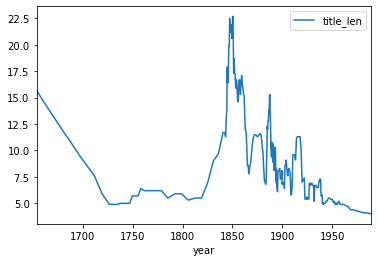

In [158]:
luther_year_len.rolling(window=10).mean().plot(x='year')

In [163]:
bib = nb.book_corpus(title="%bibel%", period=(1100, 1920), limit=5000)

In [166]:
bib['len'] = title_len(bib)

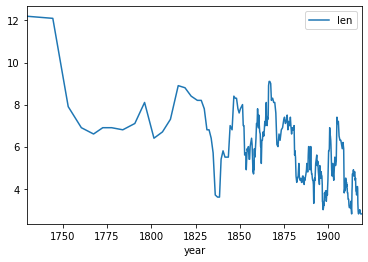

In [172]:
bib[['year', 'len']].sort_values(by='year').rolling(window=10).mean().plot(x='year')

In [152]:
text = """Book titles have developed out of the historical first page (Hoek 1981 as cited in Genette 1997). Modern paratextual elements like title and subtitle, abstract and foreword, table of contents, and publishing information, all belonged in some variant to the first page of books for a certain period within the printing history, a period which ended in the 19th century, almost within the same time span across different national publishers and printing houses. Much of the information from the first page is catalogued as title in modern metadata practice. The title in bibliographies, as a cataloging feature, became shorter over time, a process that appears to be closely connected with publishing history, and the way books are organized materially and visually.The paratextual elements, partly developed from the first page, found their way into different areas of the book layout. Title and author on the front, publishing information on third page, with table of contents before the foreword, along with index at the end, and footnotes interspersed with the text. There is a grammar to the layout of books, constant across printing houses and practices. The shortening of titles may be seen in connection with how the book binding practice changed during the first half of the 19th century, when it became custom to publish books ready bound, together with a dust jacket, or just with a dust jacket, or box. The dust jacket itself contains paratextual elements that are not found elsewhere in the book, like illustrations and blurbs, although there is an overlap in content. In this paper, we will discuss and document the development of the first page, from the middle of 19th century and onwards. Specifically, how it has developed into several parts and functions, as alluded to above, and try to list as much as possible of the paratextual elements that go into a book, in addition to what emanated from the historical first page. One hypothesis to investigate is the parallel development of book binding practices with certain paratextual elements. We will also discuss paratext as metadata, how some of these elements may disappear with digital publishing, while reoccurring in different places within the digital codex. For example, the index is a hidden feature of digital books, and no longer an explicit textual element, while footnotes may be interactive elements of the book, similar to hyperlinks for bibliographic references. Our material consists of metadata from available repositories from different libraries, and the collection of digitized books from the National Library of Norway
"""

In [153]:
len(text.split())

417

In [151]:
luther_df

,urn,author,title,year,title_len
55,2016112829001,"Bang, Christen Staphensøn","Postilla Catechetica, Ded er: Doct. Martini Lu...",1650,108
52,2016022629002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1651,110
48,2015102229002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1652,110
54,2015102229006,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1652,110
49,2015102229007,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,110
51,2015102229009,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,110
53,2015102229008,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1653,110
50,2015102229004,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1654,110
10,2015092829005,"Bang, Christen Staphensøn","Postilla Catechetica, ded er: Doct. Martini Lu...",1657,155
47,2015090327002,"Bang, Christen Staphensøn","[Postilla Catechetica, Ded er: Doct. Martini L...",1662,110


In [9]:
nb.urn_concordance(word='paratekst', urns=urns, before=10, after=10)

"(Sic), Røssaak, Eivind, 2001",I 1982 lanserte Genette ordet «,paratekst,» som en betegnelse på litteraturens snittflater :
"(Sic), Røssaak, Eivind, 2001",None,paratekst,": en tittel , en undertittel , mellomtider , forord"
"(Sic), Røssaak, Eivind, 2001",eller følgesvenner . Her lanseres et utvidet begrep om «,paratekst,» : « informasjoner som gjør teksten synlig for oss
"(Sic), Røssaak, Eivind, 2001",None,paratekst,( av gr . para « ved siden av »
"(Sic), Røssaak, Eivind, 2001",Offentlig,paratekst,", såkalt epitekst , dvs. relevante tekster publisert utenfor ("
"Nyheten som hypertekst, Engebretsen, Martin, 2001","hvordan fotografienes status og relasjonen mellom bilde , brødtekst og",paratekst,har utviklet seg gjennom de seneste tiår mot en stadig
"Nyheten som hypertekst, Engebretsen, Martin, 2001",innholdsstrukturen i lengre tekster representert verbalt vha ulike former for,paratekst,"; innholdsfortegnelser , indekser , titler , ingresser etc. ~"
"Nyheten som hypertekst, Engebretsen, Martin, 2001",i fremstillingen av bestemte informasjonsstrukturer . I stedet for verbal,paratekst,"benyttes her en sammensetning av firkanter ( "" blokker """
"Nyheten som hypertekst, Engebretsen, Martin, 2001",Om begrepet,paratekst,", se Genette 1992 [ 1987 ] , Frandsen 1991."
"Nyheten som hypertekst, Engebretsen, Martin, 2001","Frandsen , F . ( 1991 ) "" Avisens",paratekst,"- et nyt område for medieforskningen "" i Mediekultur nr."
"I møte mellom ord og bilde, Lykke, Jon, 2000",Genettes kartlegging av tekstlige forbindelser er illustrasjonen plassert under begrepet,paratekst,", som han karakteriserer på følgende måte :"
